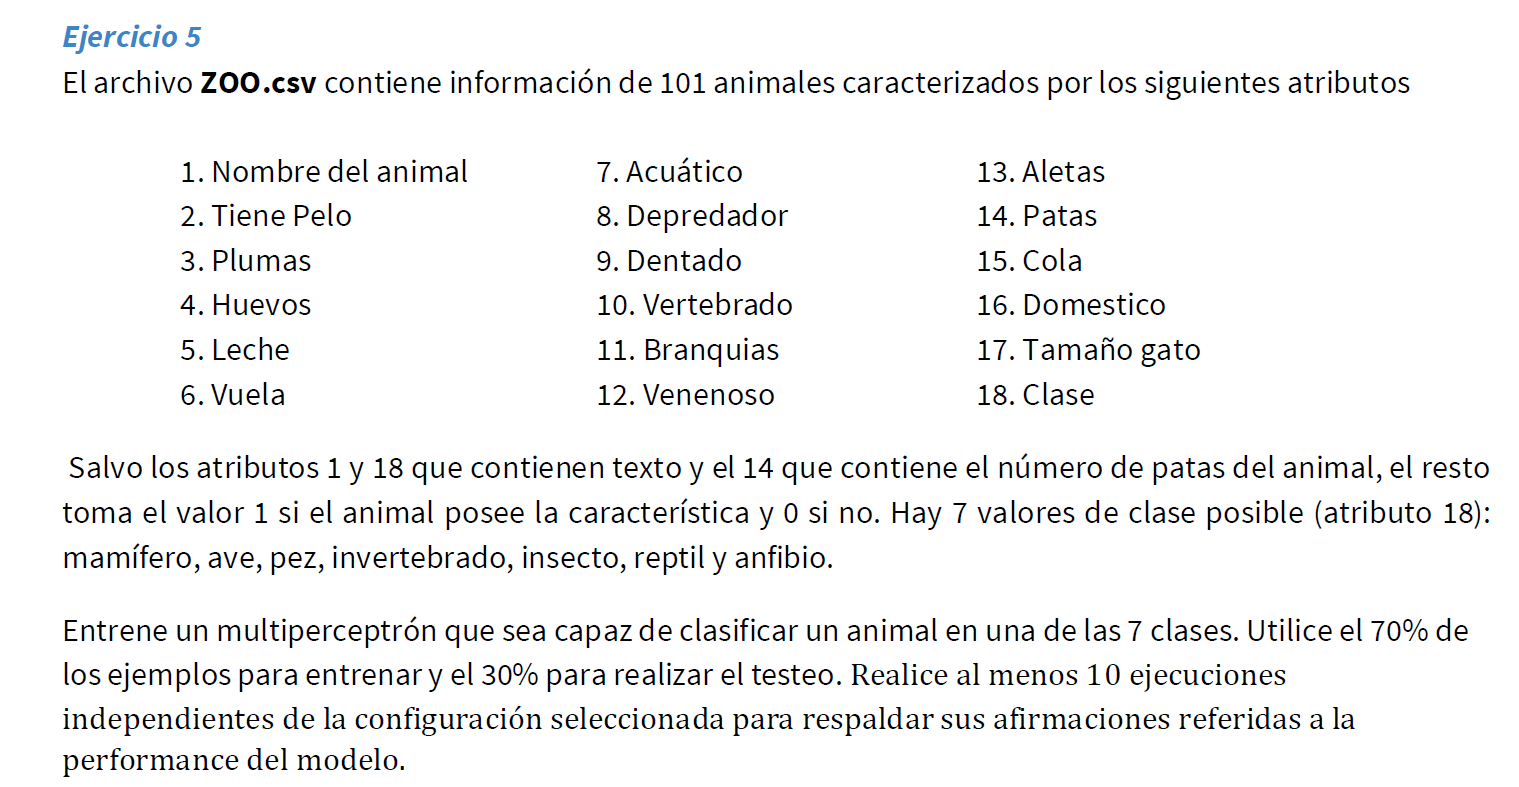

In [1]:
nombre_archivo = 'C:\\Users\\Usuario\\Documents\\GitHub\\Deep-Learning\\Datos-Fuentes\\Datos\\ZOO.csv'

In [2]:
import os

##nombre_archivo = './Datos-Fuentes/Datos/Vinos.csv'

# Verifica si el archivo existe
if os.path.exists(nombre_archivo):
    print(f"El archivo {nombre_archivo} existe.")
else:
    print(f"El archivo {nombre_archivo} no se encuentra en la ruta especificada.")

El archivo C:\Users\Usuario\Documents\GitHub\Deep-Learning\Datos-Fuentes\Datos\ZOO.csv existe.


<bound method NDFrame.head of              animal  Tiene_Pelo  Tiene_Plumas  Nace_de_huevo  Toma_Leche  \
0    oso_hormiguero           1             0              0           1   
1          antilope           1             0              0           1   
2            robalo           0             0              1           0   
3               oso           1             0              0           1   
4            jabali           1             0              0           1   
..              ...         ...           ...            ...         ...   
96          canguro           1             0              0           1   
97           avispa           1             0              1           0   
98             lobo           1             0              0           1   
99           gusano           0             0              1           0   
100      troglodito           0             1              1           0   

     Vuela  Acuatico  Depredador  Dentado  Vertebrado  Re

<Axes: >

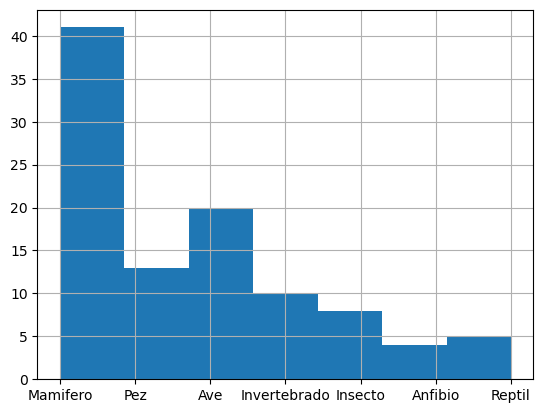

In [4]:
import chardet
import pandas as pd

# Detectar la codificación de caracteres usada
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())

# Leer el archivo CSV correctamente usando el delimitador apropiado (probablemente una coma ",")
df = pd.read_csv(nombre_archivo, encoding=result['encoding'], sep=",")

# Ver las primeras 12 filas para verificar que se haya leído correctamente
print(df.head)
df['Clase'].hist(bins=7)

In [7]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

In [11]:
# %% separa atributos y clases
X_raw=np.array(df.iloc[:,1:-1])
Y_raw=np.array(df.iloc[:,-1])   # recupera solo la primera columna (es la clase)

# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()

# Binariza cada clase como una combinación de un 1 y 0s
Y_raw = binarizer.fit_transform(Y_raw)
# Y_raw==pd.get_dummies(df[' Balance']).to_numpy() # forma alternativa para codificar

print('Las clases del dataset son :', binarizer.classes_)


Las clases del dataset son : ['Anfibio' 'Ave' 'Insecto' 'Invertebrado' 'Mamifero' 'Pez' 'Reptil']


Efectividad promedio entrenamiento = 100.0
Score promedio entrenamiento = 1.0

Efectividad promedio testeo = 93.07359307359306
Score promedio testeo = 0.9177489177489179


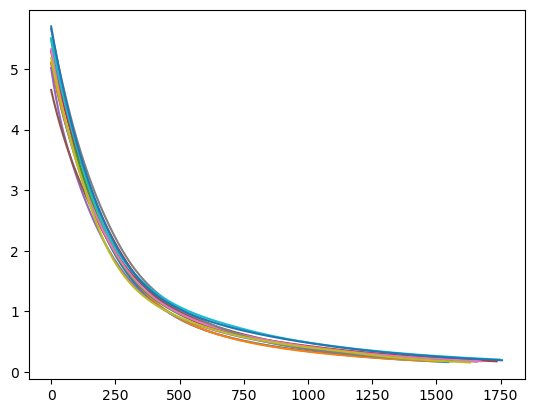

In [34]:


# Variables de configuración
ite = 11
efectividad_testeo = 0
score_testeo = 0
efectividad_entrenamiento = 0
score_entrenamiento = 0

for i in range(ite):
    # Separa ejemplos para entrenamiento y testeo
    TEST_SIZE = 0.2  # Proporción entre testeo y entrenamiento
    X_train, X_test, T_train, T_test = model_selection.train_test_split(X_raw, Y_raw, test_size=TEST_SIZE)

    # Escala los atributos de los ejemplos
    scaler = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Configuración del modelo
    Activacion = 'tanh'  # Función de activación
    redes = (12)  # Tamaño de la capa oculta
    a = 0.01  # Valor de alpha (tasa de regularización)
    Max_iteraciones = 2000  # Número máximo de iteraciones

    # Definir y entrenar el modelo
    modelo = MLPClassifier(max_iter=Max_iteraciones, hidden_layer_sizes=redes, alpha=a,
                           solver='adam', activation=Activacion, tol=0.0002,
                           verbose=False).fit(X_train, T_train)

    # ########### Medición del entrenamiento ######################
    Y_predict = modelo.predict(X_train)  # Hago la predicción en el conjunto de entrenamiento
    score = modelo.score(X_train, T_train)  # Calculo el score (accuracy) en entrenamiento

    # "Invierte" la transformación binaria para obtener los nombres de las clases
    Y_it = binarizer.inverse_transform(T_train)
    Y_predict_it = binarizer.inverse_transform(Y_predict)

    # Cálculo manual de la efectividad en el entrenamiento
    efectividad_entrenamiento += 100 * (Y_predict_it == Y_it).sum() / len(Y_it)
    score_entrenamiento += score

    # Graficar la curva de pérdida del modelo
    plt.plot(modelo.loss_curve_)

    # ########### Medición del testeo ######################
    Y_pred = modelo.predict(X_test)  # Hago la predicción en el conjunto de prueba
    score = modelo.score(X_test, T_test)  # Calculo el score (accuracy) en prueba

    # "Invierte" la transformación binaria para obtener los nombres de las clases
    Y_it = binarizer.inverse_transform(T_test)
    Y_pred_it = binarizer.inverse_transform(Y_pred)

    # Cálculo manual de la efectividad en el testeo
    efectividad_testeo += 100 * (Y_pred_it == Y_it).sum() / len(Y_it)
    score_testeo += score

# Promediar la efectividad y score en entrenamiento y testeo
print(f"Efectividad promedio entrenamiento = {efectividad_entrenamiento / ite}")
print(f"Score promedio entrenamiento = {score_entrenamiento / ite}\n")

print(f"Efectividad promedio testeo = {efectividad_testeo / ite}")
print(f"Score promedio testeo = {score_testeo / ite}")

